In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [61]:
def build_random_rain_barchart(height_list_length: int, max_height: int) -> list:
    """
    Generate a bar chart with random heights to simulate rainfall, with an accompanying ellipse to represent a rain cloud.
    
    Parameters:
    height_list_length (int): The length of the list of heights for the bar chart.
    max_height (int): The maximum possible height for the bars.
    
    Returns:
    height_list (list): A list of random heights generated for the bar chart.
    """
    # Generate a list of random heights for the bars
    height_list = np.random.randint(0,max_height, size=height_list_length)
    
    # Create a new figure and axis for the bar chart
    fig_bar = plt.figure(figsize=(4,4))
    ax_bar = fig_bar.add_subplot(111)

    # Create the bar chart with the generated heights
    ax_bar.bar(np.arange(height_list_length)+0.5, height_list, width=1, color='brown')
    ax_bar.set_ylim(0,height_list_length)
    
    # Set the y-axis label and tick marks to match the number of bars
    ax_bar.set_ylabel('Height')
    ax_bar.set_yticks(np.arange(height_list_length))
    
    # Set the x-axis tick marks to match the number of bars
    ax_bar.set_xticks(np.arange(height_list_length))
    
    # Add an ellipse to represent a rain cloud above the center of the chart
    ax_bar.add_patch(Ellipse((height_list_length/2, height_list_length-2), height_list_length*0.75, height_list_length*0.25, fc='gray'))
    
    # Add an annotation to label the rain cloud
    ax_bar.annotate('Rain', xy=(height_list_length/2, height_list_length/2 + 2), xytext=(height_list_length/2, height_list_length-2), 
                    arrowprops = dict(facecolor='darkblue'),color='white', fontsize=20)
    
    # Display the bar chart
    plt.show()
    
    # Return the list of generated heights
    return height_list

In [62]:
def after_rainfall_bar(height_list: list, rain_list: list) -> None:
    """
    Generate a bar chart showing the heights of bars before and after a rainfall.
    
    Parameters:
    height_list (list): The list of heights for the bars before the rainfall.
    rain_list (list): The list of additional heights for the bars after the rainfall.
    
    Returns:
    None
    """
    # Create a new figure and axis for the bar chart
    fig_rain = plt.figure(figsize=(4,4))
    ax_rain = fig_rain.add_subplot(111)

    # Create two sets of bars: one for the original heights, and one for the additional heights after the rainfall
    ax_rain.bar(np.arange(len(height_list))+0.5, rain_list+height_list, width=1, color='darkblue')
    ax_rain.bar(np.arange(len(height_list))+0.5, height_list, width=1, color='brown')
    
    # Set the y-axis limit, label, and tick marks to match the number of bars
    ax_rain.set_ylim(0,len(height_list))
    ax_rain.set_ylabel('Height')
    ax_rain.set_yticks(np.arange(len(height_list)))
    
    # Set the x-axis tick marks to match the number of bars
    ax_rain.set_xticks(np.arange(len(height_list)))
    
    # Display the bar chart
    plt.show()


In [63]:
def rain_calc(height_list):
    """
    Calculates the rainfall for a list of heights.

    Args:
        height_list (list): A list of heights.

    Returns:
        list: A list of the same length as `height_list` containing the amount of
        rainfall for each height.

    Raises:
        ValueError: If `height_list` is empty or contains negative values.
    """
    # Check that the height list is not empty and contains only non-negative values
    if len(height_list) == 0: # not pythonic but prevents numpy issues
        raise ValueError("height_list cannot be empty")
    if any(height < 0 for height in height_list):
        raise ValueError("height_list can only contain non-negative values")

    keep_h_list = []
    current_height = 0
    outer_loop_index = 0

    # Loop through the height list
    while outer_loop_index < len(height_list):

        # If the current height is lower than the previous height, there is rainfall
        if height_list[outer_loop_index] < current_height:
            left_height_diff = current_height - height_list[outer_loop_index]

            next_height_count = 0
            right_step = 0
            loop_index = outer_loop_index+1
            greatest_index = outer_loop_index+1

            # Find the greatest height after the current height and its index
            while (next_height_count < current_height) and loop_index < len(height_list):
                if next_height_count < height_list[loop_index]:
                    next_height_count = height_list[loop_index]
                    greatest_index = loop_index
                loop_index += 1

            # Calculate the height of the rainfall
            ij_diff = greatest_index - outer_loop_index
            lowest_of_two_highs = min(next_height_count, current_height)
            height_to_add = lowest_of_two_highs - height_list[outer_loop_index:outer_loop_index+ij_diff]
            height_to_add[height_to_add < 0] = 0
            if len(height_to_add) == 0:
                height_to_add = [0]

            # Add the height of the rainfall to the list
            keep_h_list.extend(height_to_add)

            # Set the current height to the minimum height within the current range
            if len(height_list[outer_loop_index:outer_loop_index+ij_diff]) != 0:
                current_height = min(height_list[outer_loop_index:outer_loop_index+ij_diff])

            # Move the outer loop index to the index of the greatest height
            if outer_loop_index < len(height_list)-1:
                outer_loop_index = greatest_index
            else:
                outer_loop_index += 1

        # If the current height is greater than or equal to the previous height, there is no rainfall
        elif height_list[outer_loop_index] >= current_height:
            keep_h_list.extend([0])
            current_height = height_list[outer_loop_index]
            outer_loop_index += 1

    total_rainfall = np.sum(keep_h_list)
    print(f"Total rainfall: {total_rainfall}")
    return keep_h_list


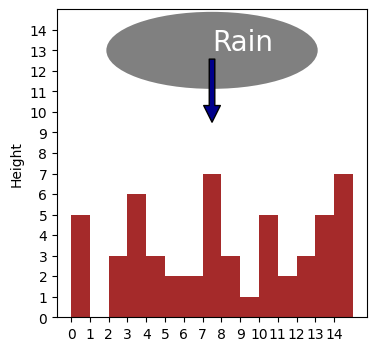

Total rainfall: 41


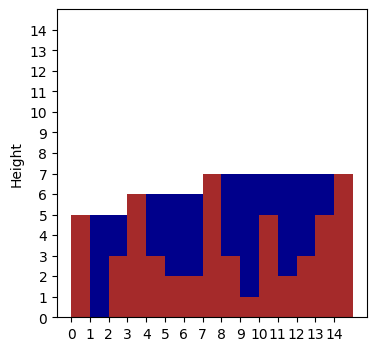

In [64]:
heights = build_random_rain_barchart(15,8)
rain_locs = rain_calc(heights)
after_rainfall_bar(heights, rain_locs)

left height:5
[5 4 7 3 4]
left height:2
[2]
left height:1
[0]
left height:5
[0]
Total rainfall: 25


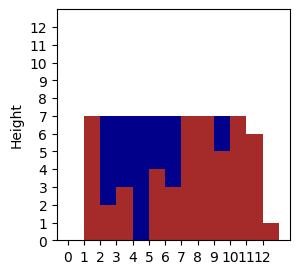